# Gophers and Trees
## Biological ecotone drivers

Spatio-Temporal Analysis Final Project
Michael Drake

## Background
Ecotones, the boundaries between distinct ecosystems are usually driven by large scale, abiotic factors such as rainfall or fire.  However, a growing body of research has shown that these boundaries are sometimes driven by ecological interactions.  In this study, we investigate one possible instance of an ecotone driven by interspecific interactions, namely the maintainance of alpine meadows via the mutual inhibition of pocket gophers and coniferous trees.

Alpine meadows are a distinctive feature of the Colorado Rockies and are drastically juxtaposed by their surrounding pine forests.  These meadows are home to a wide range of grass and forbe species which provide ample feed for pocket gophers (*Thomomys sps.*), whose mounds are abundant within these meadows.  However, both gophers and their forage disappear in the pine forests, where lodgepole pines (*Pinus contortata*) become the dominant species.  In this study, we investigate three hypotheses that may explain the observed ecologoical patterning:

(1) Mature trees reduce gopher forage, thereby inhibiting the entry of gophers into conifer forests
(2) Gophers create high mortality of young trees, preventing the establishment of young trees in gopher populated areas
(3) New gopher mounds are created away from mounds from the previous year as gophers move to locations with higher levels of forage

Testing these hypotheses will allow us to further understand if mutual inhibition between gophers and trees serves to maintain the boundaries of alpine meadows.

## Methodological Flow

We will investigate these questions using a data set provided by the Doak Lab that describes the location of trees and gopher mounds within and around two alpine meadows near the University of Colorado Mountain Research Station.  This data set provides observations of gopher mounds produced in the years 2013, 2014, and 2015, as well as the locations of large trees (height >=2m) and small trees (height < 2m).

We will analyze these data using the *spatstat* package in program R.  Our goal is to understand if the location of gopher mounds and trees have any spatial patterning in relationship to each other or if they are spaced randomly.  To do this, we will calculate the cross Ripley's *K* function of the ditribution of our observation points.  This function is given as:


**$K_{ij}(r)=λ^{-1} E[f_{ij}(r)]$**

where *fij* is a measurement of the events of type *j* within a distance *r* of a randomly chosen event *i*.  Importantly, observations *i* and *j* must come from different groups (i.e. gophers and large trees) or the equation reduces down to a basic *K* function for unmarked spatial points.  We will display the *L* transformed version of this *K* function, **$L(r)=\sqrt{\frac{K(r)}{\pi}}$**, which stablizes *K* over larger values of *r*.  The utility of the *K* function and its *L* transofrmation is that it allows us to see how our observed spatial patterning differs from Poisson distributed randomness at varying spatial extents (expressed as *r*).

Alright, time for us to gopher it!

In [40]:
#Our estimation of Ripley's K and L statistics requires the spatstat package and one other for making pretty tables
require(spatstat)
require(gridExtra)

Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.3.2"

In [71]:
#Our data is the lat/long co-ordinates of gopher mounds, large trees, and small trees in two alpine meadows
#Plot: Upper or Lower meadow
#Type: G= Gopher Mound
#Year: Season that the gopher mound was observed.  No year given for trees
#ID and Year1: Unused

data<-read.csv("Gopher.csv",na.string=NA)
head(data)
summary(data$Type) #Number of observations in each category

,ID,Plot,Long,Lat,Type,Size,Year,Year1
1,NA,Lower,-105.5410596,40.03120014,SMTREE,0.18,SMTREE,2013
2,NA,Lower,-105.5410584,40.03119815,SMTREE,0.57,SMTREE,2013
3,NA,Lower,-105.5411408,40.03119767,SMTREE,0.38,SMTREE,2013
4,NA,Lower,-105.5410488,40.03119155,LGTREE,56.9,LGTREE,2013
5,NA,Lower,-105.5411489,40.03118695,SMTREE,0.4,SMTREE,2013
6,NA,Lower,-105.5411351,40.03118574,SMTREE,0.56,SMTREE,2013


G LGTREE SMTREE 
  1309    209    651

In [72]:
#We will be analyzing our two plots independently, so we begin by subsetting our data
upper<-data[data$Plot=="Upper",c(1:8)]
lower<-data[data$Plot=="Lower",c(1:8)]

In [10]:
#Creating a spatial point pattern object for both meadows
#Boundaries of the study area are set as the maximum/minimum lat and long of observations in each meadow
#Some duplicate co-ordinates are present, but they will not influence our analysis
#Within these point objects, we set the marks (data subdivision) to be Type for our first analysis

up.points<-ppp(upper[,3],upper[,4],c(-105.543371639,-105.5427153),
            c(40.02966322,40.03029443))
marks(up.points)<-factor(upper$Type)

lw.points<-ppp(lower[,3],lower[,4],c(-105.5413336,-105.540909),
               c(40.03058751,40.03120014))
marks(lw.points)<-factor(lower$Type)

Warning message in ppp(upper[, 3], upper[, 4], c(-105.543371639, -105.5427153), :
"data contain duplicated points"Warning message in ppp(lower[, 3], lower[, 4], c(-105.5413336, -105.540909), c(40.03058751, :
"data contain duplicated points"

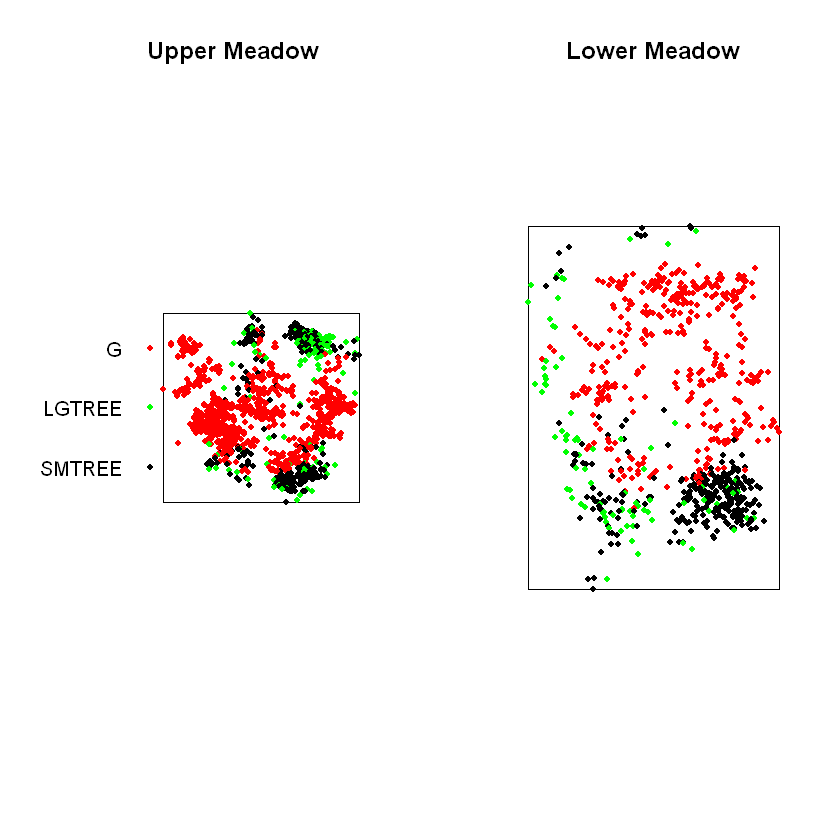

In [27]:
#Let's visualize our points!
#Again, G=gopher mounds, LGTREE=large trees, SMTREE= small trees
par(mfrow=c(1,2))
plot(up.points,cols=c("red","green","black"),pch=20,main="Upper Meadow")

plot(lw.points,cols=c("red","green","black"),pch=20,main="Lower Meadow",legend=F)

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


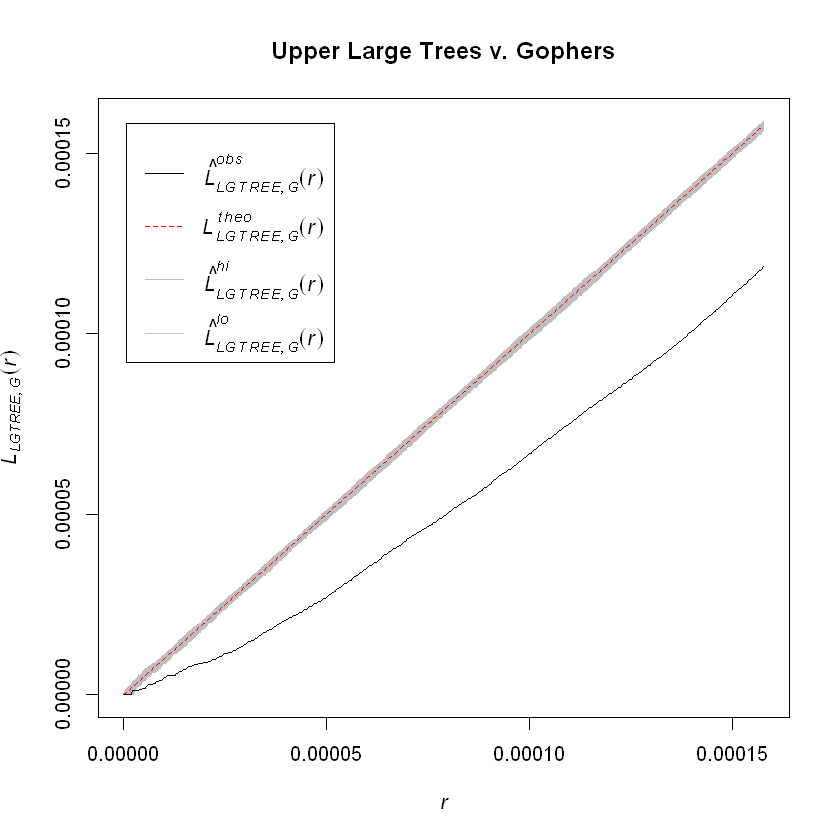

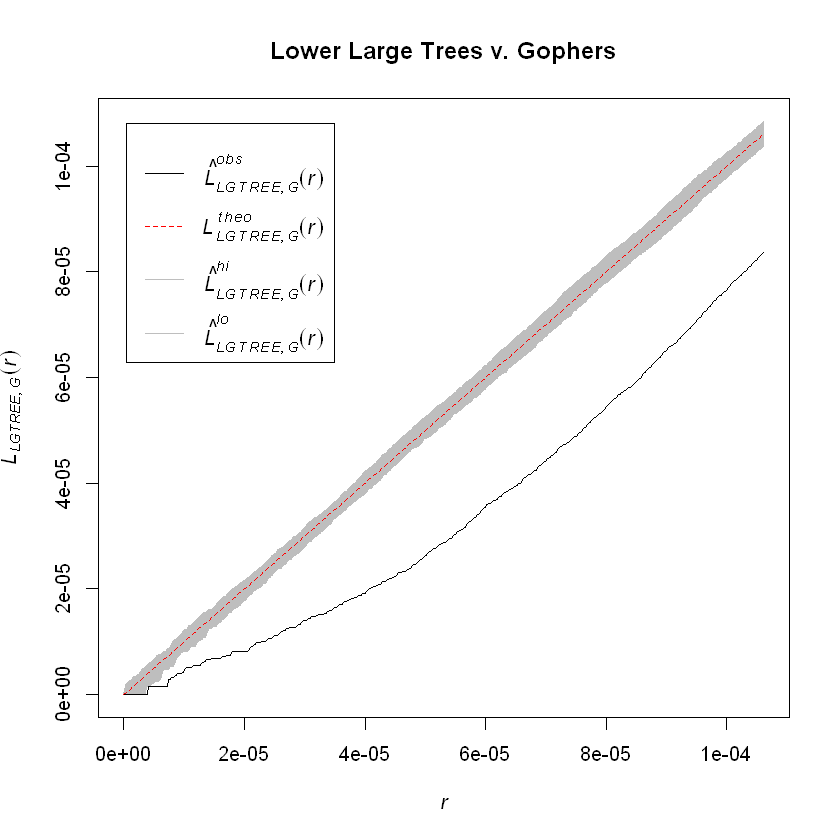

In [31]:
#Let's explore the relationship between large trees and gopher mounds in both plots
#We will use the L transformation of Ripley's K as it stablizes the K function and is visually easier to interpret

#Upper
plot(envelope(up.points,Lcross,i="LGTREE",j="G"),main="Upper Large Trees v. Gophers")

#Lower
plot(envelope(lw.points,Lcross,i="LGTREE",j="G"),main="Lower Large Trees v. Gophers")

## Interpretation
In the above graphs, the shaded region around the red line represents the confidence interval for patterning that would be considered to have complete spatial randomness (CSR).  The black line represents the patterning that we our observing at varying spatial extents (r).  Positive observed values (in relationship to the red line) indicates clustering, while negative values indicates over dispersal.

Within both meadows, we are seeing strong overdispersion of gopher mounds in relationship to large trees.  This effect is smaller at small r distances and is strongest at moderate and large r's.

Our next steps will be to test the relationships between our remaining types, namely between gopher mounds and small trees, and between small trees and large trees

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


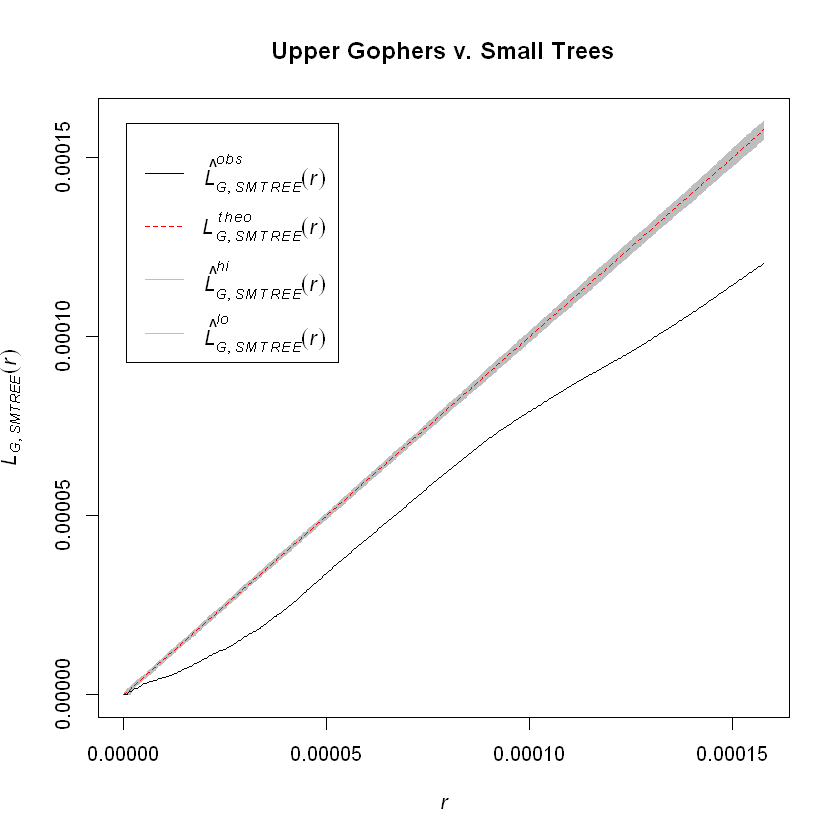

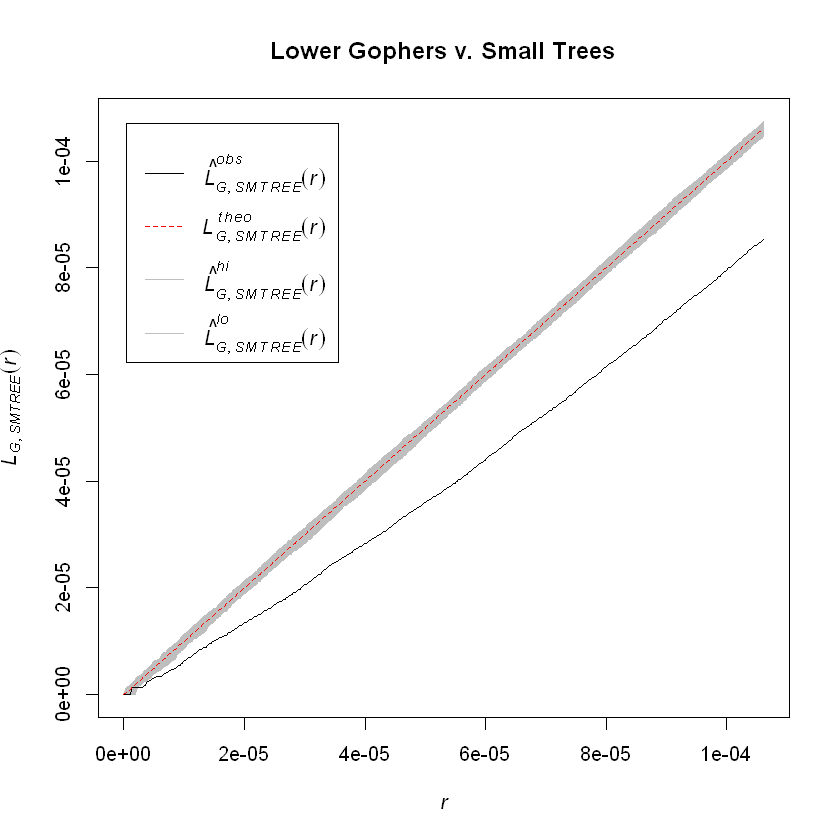

In [32]:
#Gopher mounds and small trees

#Upper
plot(envelope(up.points,Lcross,i="G",j="SMTREE"),main="Upper Gophers v. Small Trees")

#Lower
plot(envelope(lw.points,Lcross,i="G",j="SMTREE"),main="Lower Gophers v. Small Trees")

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


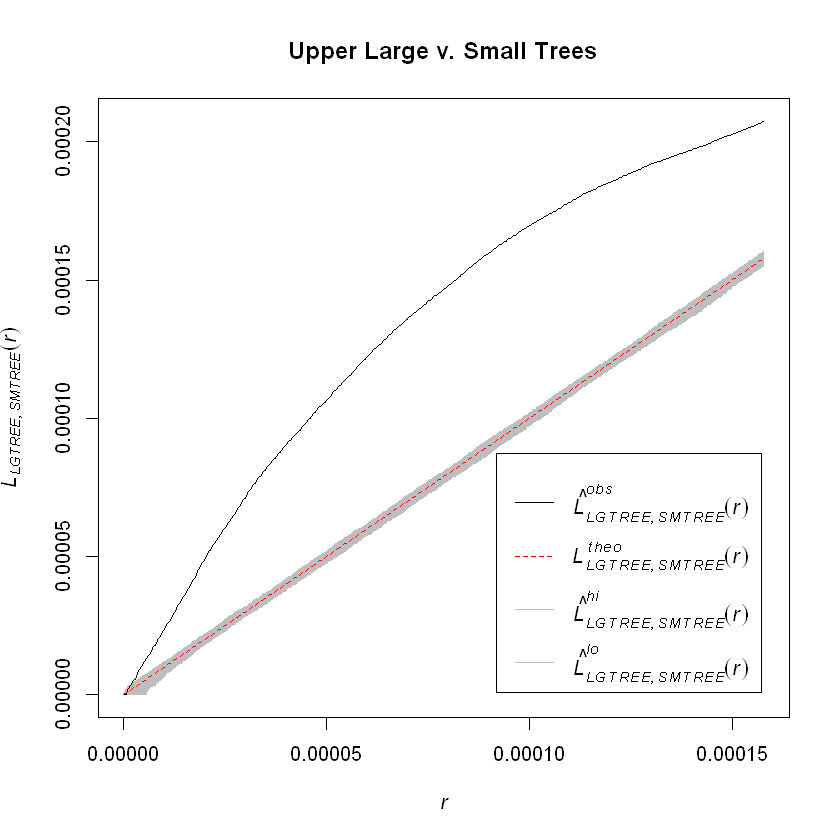

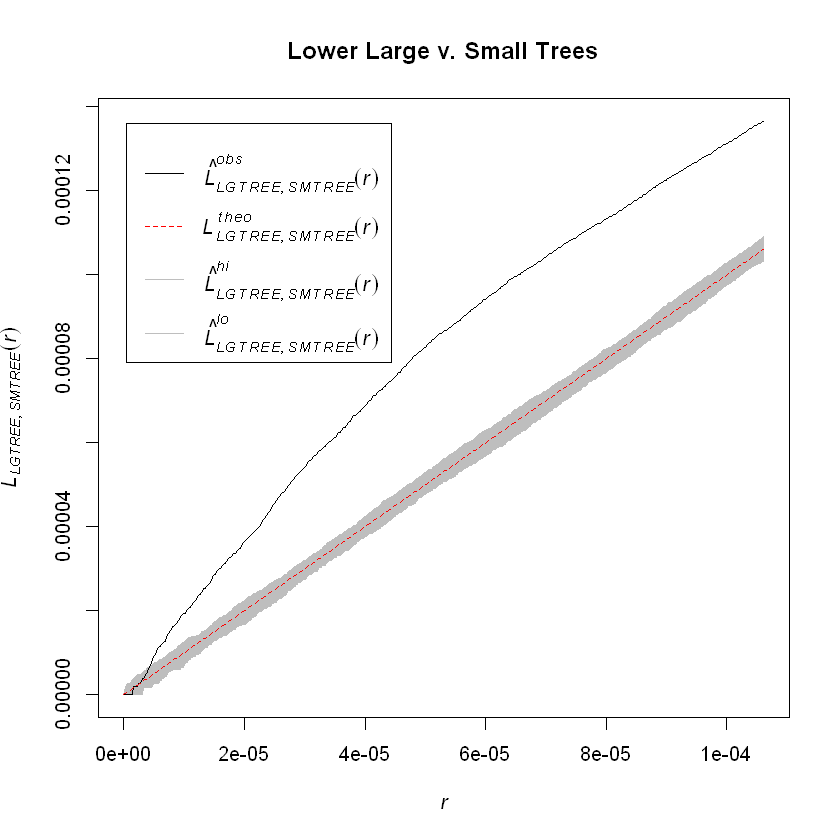

In [33]:
#Small and Large trees
#Note that this analysis does not address any of our hypotheses, but is an interesting thing to check nonetheless.  

#Upper
plot(envelope(up.points,Lcross,i="LGTREE",j="SMTREE"),main="Upper Large v. Small Trees")

#Lower
plot(envelope(lw.points,Lcross,i="LGTREE",j="SMTREE"),main="Lower Large v. Small Trees")

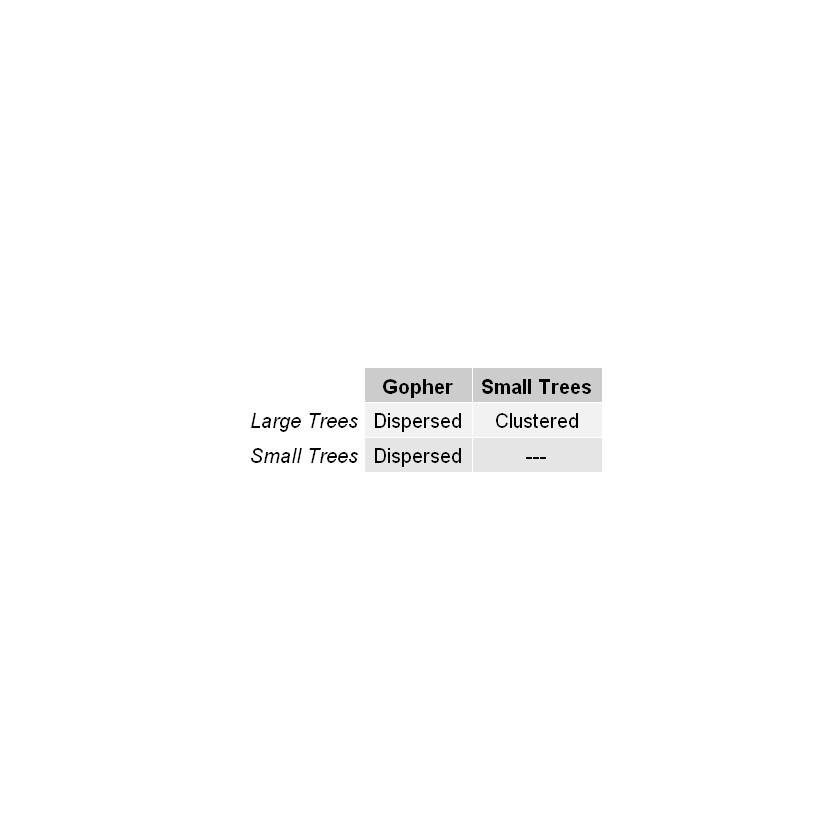

In [41]:
#Let's create a table to summarize our results

results<-matrix(c("Dispersed","Clustered","Dispersed","---"),ncol=2,byrow=T)
colnames(results)<-c("Gopher","Small Trees")
rownames(results)<-c("Large Trees","Small Trees")
results<-as.table(results)
grid.table(results)

## Gophers through time
Our next research question involves investigating the spacing of gopher mounds across two time lags.  We have data on gopher mounds observed in 2013, 2014, and 2015.  We would like to see if the placement of gopher mounds has any relationship to the location of the previous year's mounds.  Again, we will be using an *L*- transformed Ripley's *K* to see if these mounds are dispersed, clustered, or at CSR.

In [87]:
# We first reassign the marks on our upper and lower meadow data
#Note that tree points do not have a numeric year associated with them, so we will remove them
#After removing tree points, we also reframe our area to the extent of only the gopher mounds

summary(data$Year)

upper2 <- upper[upper$Year %in% c("2013","2014","2015"),]
lower2 <- lower[lower$Year %in% c("2013","2014","2015"),]

up.points2<-ppp(upper2[,3],upper2[,4],c(-105.543371639,-105.542728916),
            c(40.02976193,40.03023707))
marks(up.points2)<-factor(upper2$Year)

lw.points2<-ppp(lower2[,3],lower2[,4],c(-105.541309,-105.540909),
               c(40.03072353,40.0311359))

marks(lw.points2)<-factor(lower2$Year)

summary(up.points2$marks)
summary(lw.points2$marks)

2013   2014   2015 LGTREE SMTREE 
   476    562    271    209    651

Warning message in ppp(upper2[, 3], upper2[, 4], c(-105.543371639, -105.542728916), :
"data contain duplicated points"Warning message in ppp(lower2[, 3], lower2[, 4], c(-105.541309, -105.540909), c(40.03072353, :
"data contain duplicated points"

2013 2014 2015 
 253  527  158

2013 2014 2015 
 223   35  113

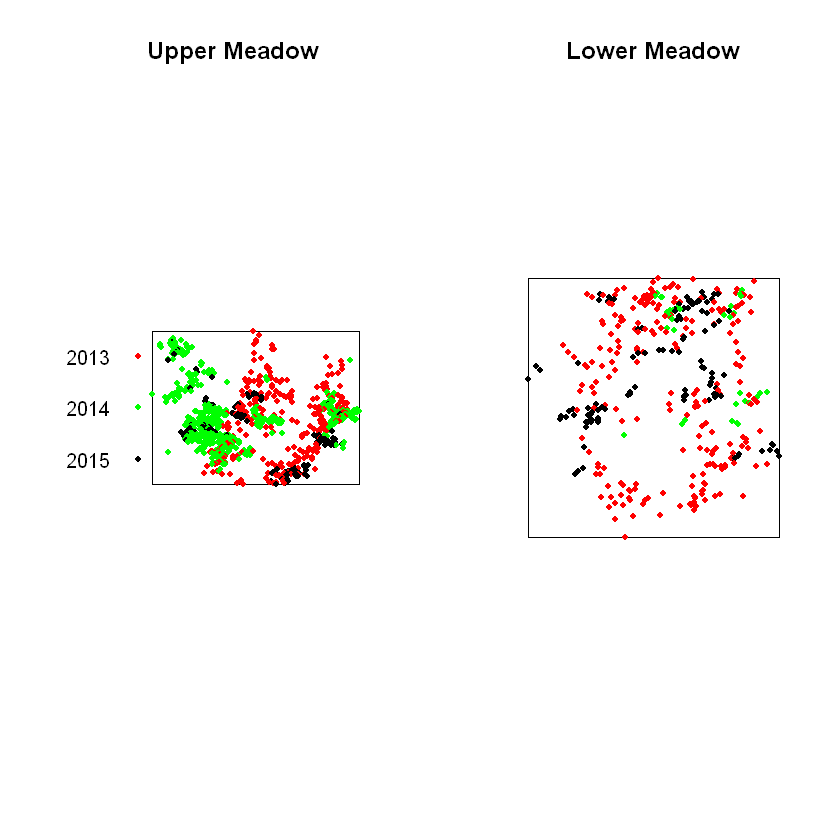

In [88]:
par(mfrow=c(1,2))
plot(up.points2,cols=c("red","green","black"),pch=20,main="Upper Meadow")

plot(lw.points2,cols=c("red","green","black"),pch=20,main="Lower Meadow",legend=F)

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


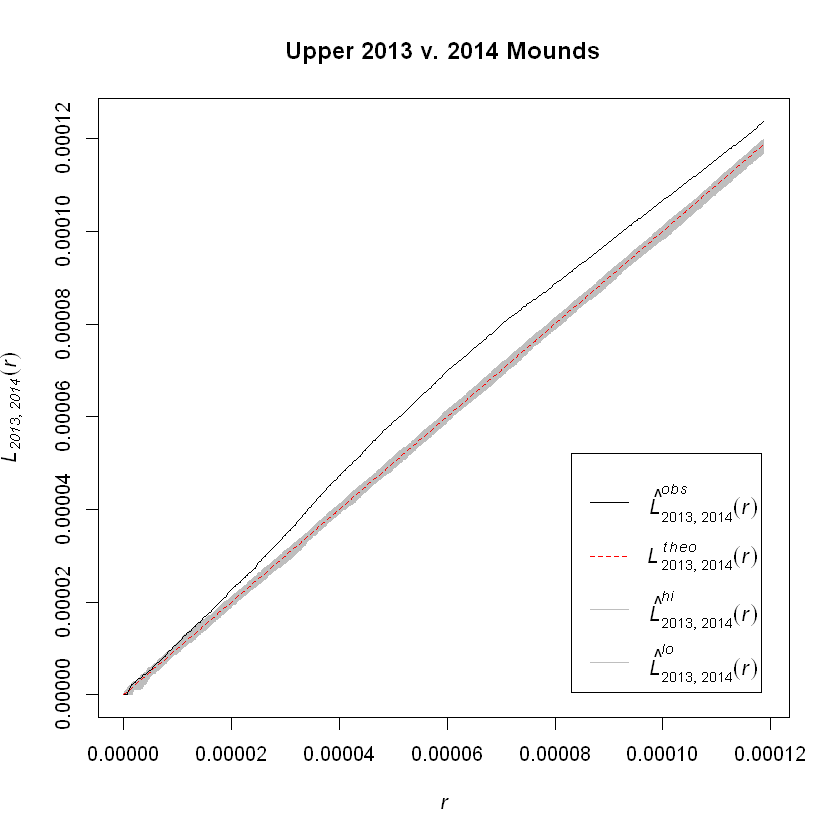

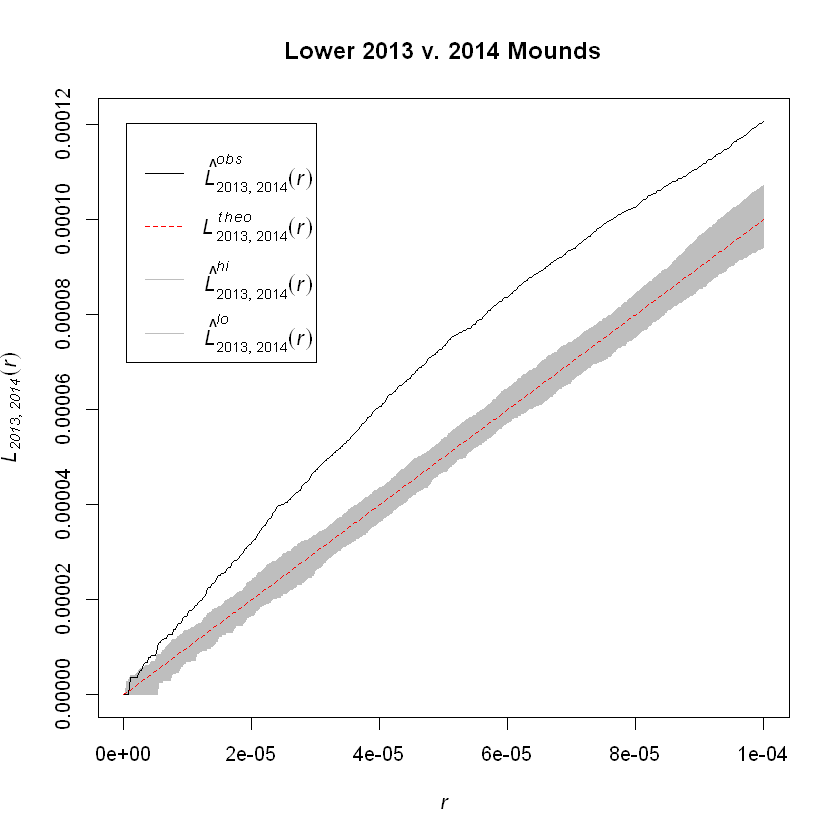

In [92]:
#First we compare 2013 and 2014 mounds

#Upper
plot(envelope(up.points2,Lcross,i="2013",j="2014"),main="Upper 2013 v. 2014 Mounds")

#Lower
plot(envelope(lw.points2,Lcross,i="2013",j="2014"),main="Lower 2013 v. 2014 Mounds")

Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.
Generating 99 simulations of CSR  ...
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,  99.

Done.


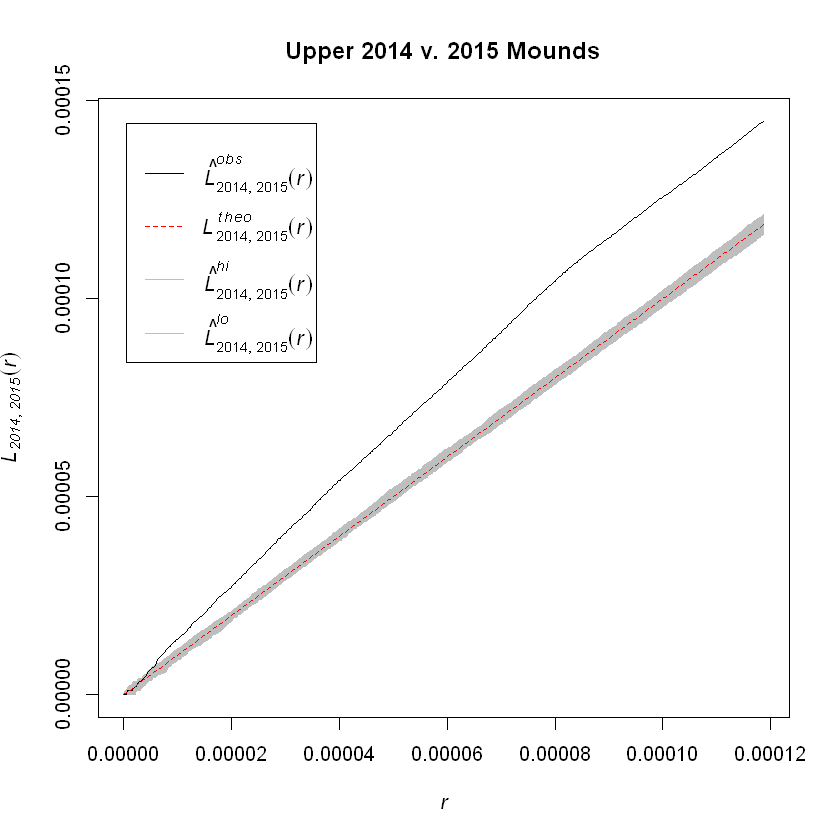

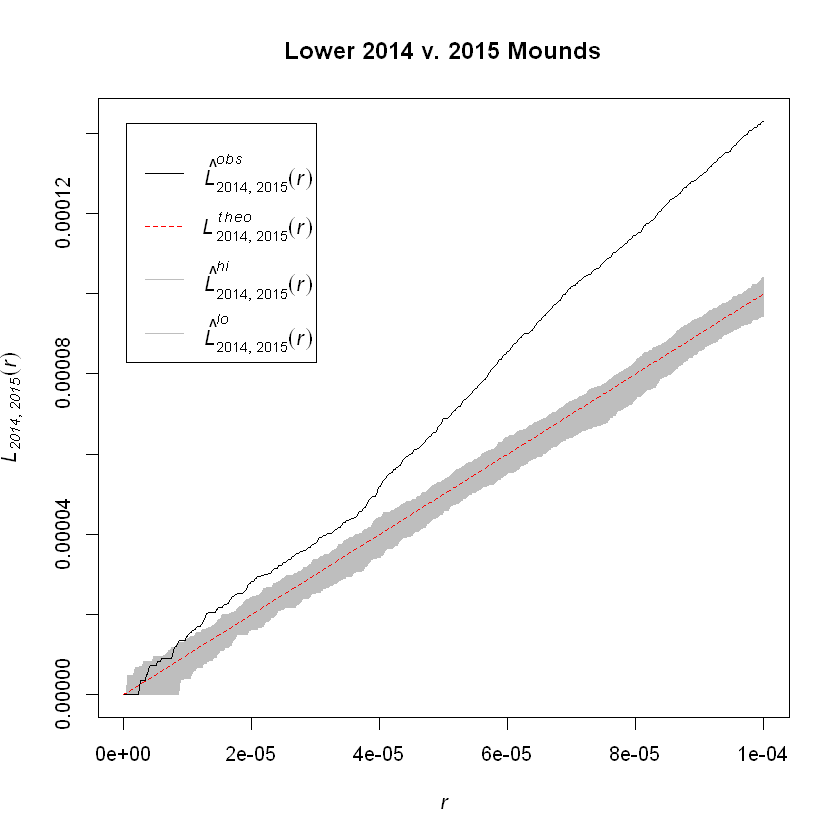

In [90]:
#Next, 2014 and 2015 mounds

#Upper
plot(envelope(up.points2,Lcross,i="2014",j="2015"),main="Upper 2014 v. 2015 Mounds")

#Lower
plot(envelope(lw.points2,Lcross,i="2014",j="2015"),main="Lower 2014 v. 2015 Mounds")

# Time lag interpretation
In all four of the above comparisons, we see that gopher mounds are clustered between years, especially at moderate and large r values.  These results are contrary to our initial hypothesis.

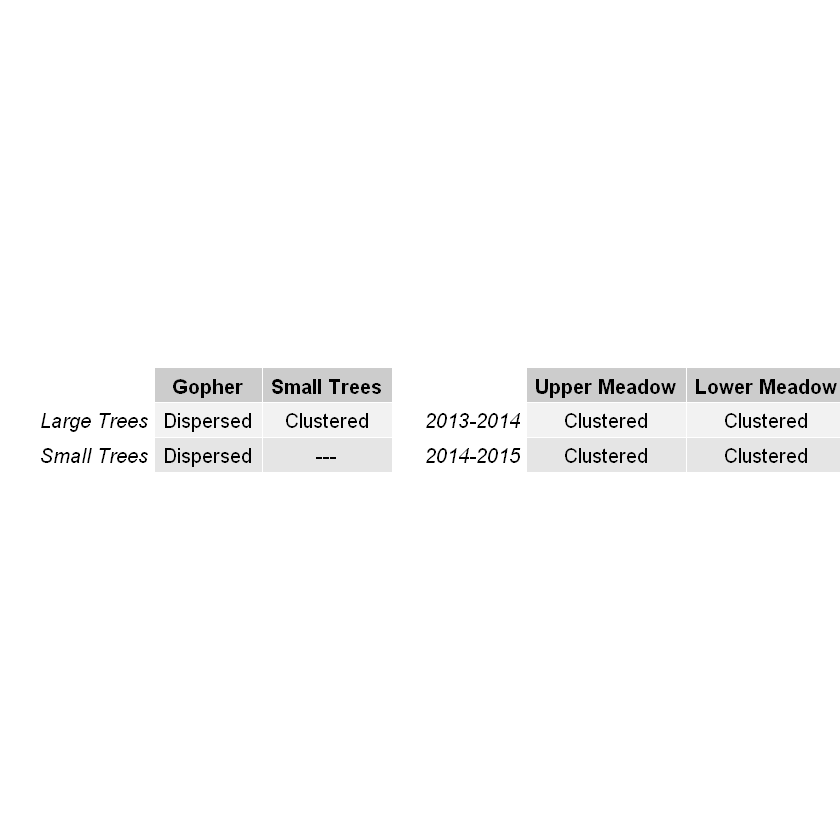

In [86]:
#Let's create one more results table and summarize everything that we've seen so far.

resultstime<-matrix(c("Clustered","Clustered","Clustered","Clustered"),ncol=2,byrow=T)
colnames(resultstime)<-c("Upper Meadow","Lower Meadow")
rownames(resultstime)<-c("2013-2014","2014-2015")
resultstime<-as.table(resultstime)

grid.arrange(tableGrob(results),tableGrob(resultstime),nrow=1)

# Conclusions

These analyses provide support for hypotheses 1 and 2, showing that large trees inhibit the creation of gopher mounds, which may in turn inhibit the establishment of small trees.  However, our ability to draw firm conclusions from these data is slightly confounded by the clustering effect of small trees and large trees.  It is possible that the relationship between gopher mounds and small trees is not reflective of any real biological connection but is driven by the large trees that small trees are clustered around.  For example, it is possible that large trees truly inhibit gopher mounds but small trees simply cannot disperse far from the large trees due to some other limiting environmental factor.  As such, there could be no connection between small trees and gopher mounds.  However, this possible explanaition is unlikely, given past literature outlining the ability of trees to disperse their offspring widely and the inhibiting effect that mature trees have on the establishment of proximate seedlings.  Further exploration will be required to definitely describe the relationship between gopher mounds and small trees.  

Our study does not support hypothesis 3, however, and shows that gopher mounds are actually clustered near mounds from the previous year.  Gophers are inherently difficult animals to study in the wild and presenting a plausible explanaition for this clustering is difficult without further data.  The clustering effect and inter annual movements of mounds could be driven by a social factor, which cannot be known without data on which individuals produced which mounds.  For example, pocket gophers only live an average of two years.  Perhaps individuals maintain a static home range and their offspring only disperse a short distance.  As individuals die and stop producing mounds between years, their offspring will remain close by and create the observed clustering as well as some inter annual movement.  However, this is all conjecture and further study will require more detailed data.

Though our study does not allow us to speak on the annual movements of gophers, our results do suggest that an interaction between gophers and trees maintains the distinct montain meadows of the Colorado Rockies.  Old, established trees inhibit the movement of gophers, which in turn prevent the establishment of younger trees.  This feedback system has created an extremely stable and dramatic ecotone that appears to be independent of any obvious, driving abiotic factors.  The long lived nature of alpine pines may be the most important factor in creating the stability of this boundary and should be further tested by removing large trees, to see if this allows for the penetration of gopher mounds into formerly forested areas, and by planting small trees in gopher inhabited areas, to see if the presence of gophers produces high mortality.